# Censoring and Truncation
### This chapter accompanies Long, Chapter 7

When we discussed the truncated poisson model, I noted that in many circumstances we observe a dataset that is truncated. Truncation means we only have data that fall above or below a particular value of the dependent variable. I used the example of ideology: say I want to estimate the impact of ideology on dollars spent during an election cycle. I only have data among those who spend at least 50,000 dollars. The data are truncated. I've excluded all cases less than 50k. I have no data for these individuals -- and by no data, I mean no independent or dependent variables.

Why might this be a limitation? Well, those who spend less may be more ideologically extreme, thus not convering on the median voter. Thus, perhaps we do not observe the full range of ideological scores, nor do we fully capture the relationship between ideology and spending (if, perhaps, ideologically extreme candidates get disproportionately less campaign donations).

Truncation means the data itself are fundamentally changed by the truncation process. We simply do not have data for candidates who spend less than 50,000 dollars. Constrast this to \emph{censoring}, which involves missing data for a dependent variable, but complete data for the covariates. Applied to the election example, say I have the ideology scores for all candidates, but I do not have spending data if the candidate spent less than 50,000 dollars. Thus, censoring does not alter the composition of the data; I have access to the exact same set of observations, even though the data are missing on $y$.

Fundamentally, this is a missing data issue. Say I don't observe any value of the dependent variable if the dependent variable is less than $\tau$. 

$\bullet$ $y_{observed} = NA$, if $y_{latent}\leq\tau\$ 

$\bullet$ $y_{observed} = y_{latent}$, if $y_{latent}\leq\tau\$

If I also observe that $x_{k}=NA$, when $y_{latent}\leq\tau$ then I have truncation. If, however, I observe $x_{k}\neq NA$, when $y_{latent}\leq\tau$ then I encounter censoring.

This type of thing often occurs in circumstances with non-random selection. Perhaps we are constructing our own dataset and cannot observe the full range of outcomes. Truncation and censoring --while they have statistical solutions -- are primarily a research design, data collection issue.

Take the classic example offered by James Tobin (1958). Assume the dependent variable is the amount of money spent on a new car. Let's also assume everyone has income, and they have a set dollar price that they will spend on the car. If the car is priced more than this value, they cannot buy the car (even though they would like to buy the car). We only observe car purchases if the cost of the car is less than the amount the person is willing to spend. In short, for all people who have a value less than this threshold, we observe missing data.

We could simply drop these people and estimate a regression line predicting spending with income. The problem is that we will underestimate the slope and overestimate the intercept. That is, we over-estimate what lower income people would spend on a car. The reason we will oberve bias is that the expected values of the errors will no longer equal zero. 

People tend to forget that truncation and censoring is a very real issue in applied settings. As this example suggests, multivariate statistics does not solve the problem, and we are left with the problem of bias in our models.

Really, the problem is related to the notion of missing data, which we will spend the next few weeks discussing. In the case of censoring and truncation, we have data that are systematically missing and the missing data are said to be **non-ignorable**. They aren't missing by some randomly generated process; they are instead systematically missing by being observed above or below a threshold. 

Let's fully parse why this matters. I'll present the \emph{why} in several different ways. First, we'll look at simulated data, and will explore the issues involved in censoring and truncation and how the problem cascades across the classical regression model. Next, we'll consider the problem from the perspective of missing data and I'll demonstrate that the process of missing data regarding censoring and truncation is non-ignorable. 

Finally, we'll see what consequences missing data has in terms of univariate statistics. I'll spend a fair amount of time on the truncated normal, which serves as a valuable foundation to establish the multivariate solutions we will discuss next week.


## Why It Matters

Let's examine why this is important in a synthetic example. Let's draw 1000 values of x from a standard normal density and define y by regression coefficients corresponding to 1 and a normally distributed error process.






Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.4009  -3.4519   0.1239   3.3458  16.0950 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.1568     0.1598   7.237 9.14e-13 ***
x             0.9988     0.1587   6.292 4.68e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.054 on 998 degrees of freedom
Multiple R-squared:  0.03816,	Adjusted R-squared:  0.03719 
F-statistic: 39.59 on 1 and 998 DF,  p-value: 4.679e-10



Call:
lm(formula = y.censored ~ x)

Residuals:
   Min     1Q Median     3Q    Max 
-5.908 -2.489 -1.125  1.944 14.562 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.5274     0.1109   22.79  < 2e-16 ***
x             0.5980     0.1101    5.43 7.07e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.506 on 998 degrees of freedom
Multiple R-squared:  0.0287,	Adjusted R-squared:  0.02773 
F-statistic: 29.49 on 1 and 998 DF,  p-value: 7.069e-08


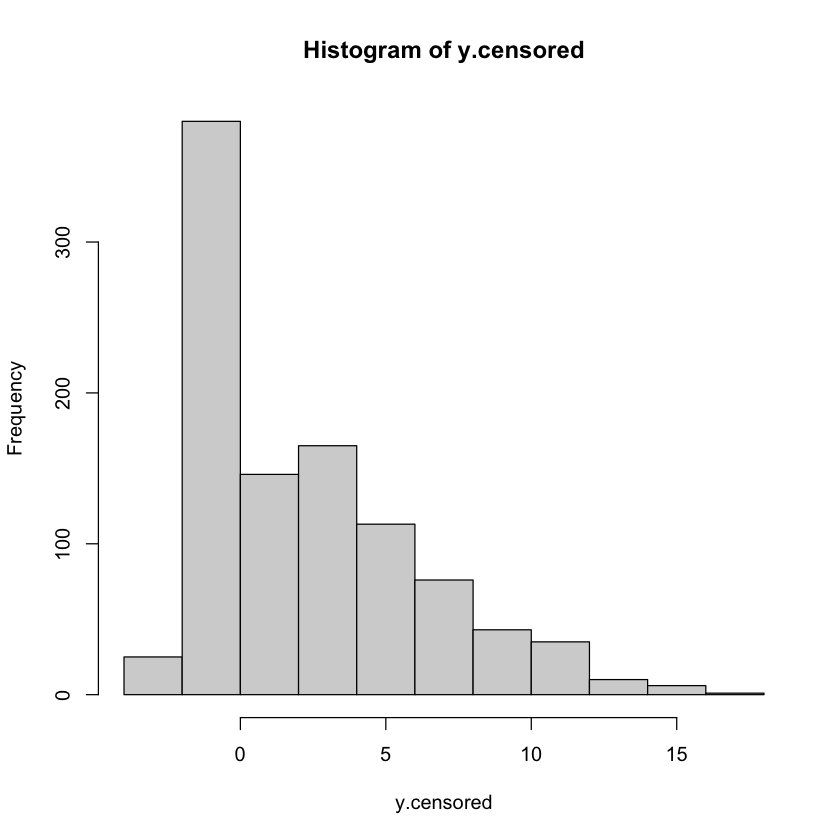


Call:
lm(formula = y.truncate ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5236 -2.8271 -0.4628  2.3213 13.7231 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.3296     0.1363  24.430  < 2e-16 ***
x             0.5071     0.1364   3.719 0.000215 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.709 on 748 degrees of freedom
  (250 observations deleted due to missingness)
Multiple R-squared:  0.01816,	Adjusted R-squared:  0.01684 
F-statistic: 13.83 on 1 and 748 DF,  p-value: 0.000215


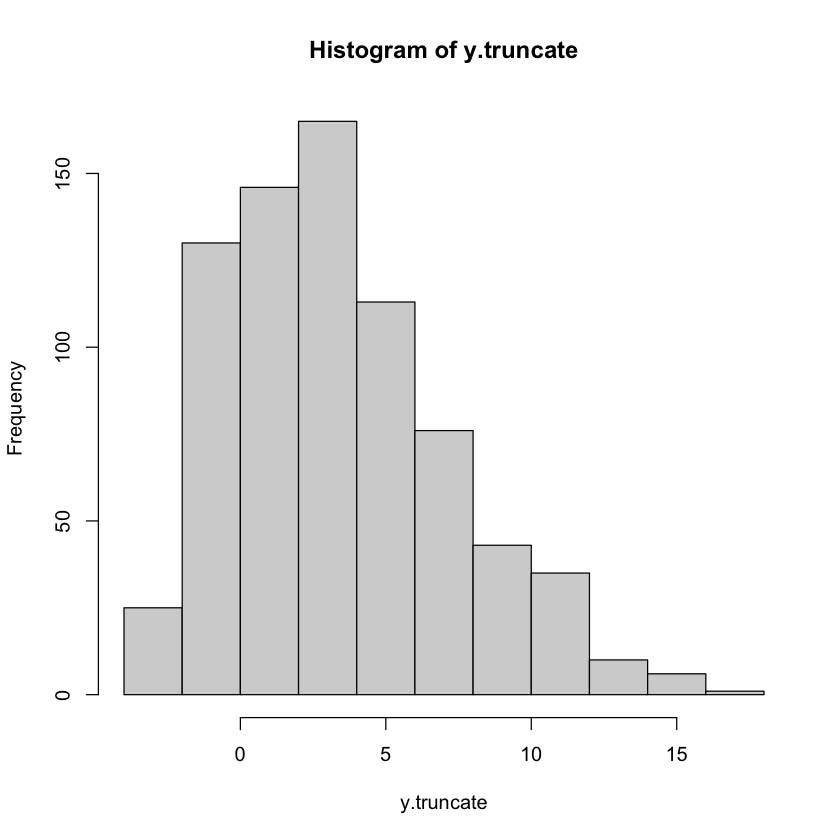

In [6]:
require(dplyr)
x <- rnorm(1000, 0, 1)
y <- 1+1*x+rnorm(1000,0,5)
summary(lm(y~x))  ##True Regression Line

y.censored<-ifelse(y < quantile(y, 0.25), 0, y)
hist(y.censored)
summary(lm(y.censored~x))  ##Censored regression

y.truncate<-ifelse(y < quantile(y, 0.25), NA, y)
hist(y.truncate)
summary(lm(y.truncate~x))  ##Censored regression



In both cases, I'm underestimating the intercept and the slope. If I were to just ignore censoring, and proceed as if it wasn't a concern, I would be incorrectly estimating the true relationship between the variables.

## Ignorability

When we think about truncation or censoring, notice this is a missing data problem. Our data are systematically missing for particular values. At this point, let's more thoroughly consider the process that produces our data. Following Gelman et al (2014), assume we have a complete data set, $y_{complete}$; though let's assume that some values of $y$ are missing. We don't know if these values are systematically missing, but we have a vector of missing and non-missing values $y_{observed}$ and $y_{miss}$. Let's assume that we then create an indicator, coded 1 if missing and 0 if observed. Now, $I \in (0,1)$.

Often, we assume what is called "ignorability" in our data. Data simply means we may safely ignore, or not model, the mechanism that produced the data (Gelman et al 2014, p.). Ignorability -- which is suspect in the truncated or censored data -- can be decomposed into two things, though here we only need consider 1 (the other will come in the missing data week).

$\star$ Data are missing at random (MAR) when:

$$p(I|x,y,\phi)=p(I|x,y_{observed},\phi)$$

Here, $\phi$ represents the parameters that generate the missing data. MAR simply means that the only factors that predict missingness stem from the data and the parameters linking the data to missingness. In other words, we can reasonably predict the outcome missingnes indicator with the full data set. But the problem is that sometimes (often?) this is untenable.  

Borrowing Gelman et al's (2014) example, consider income and tax auditing. We want to predict how well income predicts the likelihood of being audited. Now, assume that only people who make more than 10 million are audited.

Because I know exactly who is missing by the research design. Then,

$$p(I|x,y,\phi)=p(I|x,y_{observed},\phi)$$

which reads: Conditional on the data, I know the probability a data point is missing. MAR does not mean that the data are missing conditional on a single variable; it means that given the observed $y$ and x(s), along with a set of parameters, we know the the probability of the full data set.

Now considering truncation and censoring, note why ignorability shouldn't hold. The data are systematically missing by being greater (or less) than $\tau$. Only conditional on $\tau$ will ignorability hold.

This has the consequence of an error term that has a non-zero mean; or you might think about this as errors are correlated with predictor variables. In both cases, we observe that the estimates are both biased and inconsistent.

## Distributions
Part of the problem with the above examples is that I am assuming normally distributed errors; yet the errors are not normal, if I'm systematically deleting or partitioning observations to be a certain value. It's most useful to thin about censoring and truncation in terms of latent variables. If we assume that, 

$\bullet$ $y_{observed} =  NA$, when $y_{latent}\leq\tau$


$\bullet$ $y_{observed} =  y_{latent}$, when $y_{latent}\leq\tau$

We can also assume that $y_{latent}\sim N(\mu, \sigma^2)$. Thus, the pdf for $y_{latent}$ is simply the normal density.

$f(y_{latent}|\mu, \sigma)={{1}\over{\sigma}}\phi({{\mu-y_{latent}}\over{\sigma}})$

And the cdf is 

$$pr(Y_{latent}>y_{latent})=\Phi({{\mu-y_{latent}}\over{\sigma}})$$

But, if we only observe the latent variable when it is above or below a threshold, $\tau$, we cannot assume that $y_{observed}$ is normally distributed. Instead, we need to model the conditional probability of $y$ given it is above (or below) $\tau$. Just as we did with the truncated poisson density, we simply divide the pdf by the cdf, evaluated from $\tau$ to $\infty$.

So, if we only observe data greater than $\tau$, then,

$$pr(y|y>\tau, \mu, \sigma)={{f(y_{latent}|\mu \sigma)}\over{pr(y_{latent}>\tau)}}$$

If we only observe data less than $\tau$, then,

$$pr(y|y<\tau, \mu, \sigma)={{f(y_{latent}|\mu \sigma)}\over{pr(y_{latent}<\tau)}}$$

We're again calculating a conditional probability; what is the probability of observing $y$ given that $y$ exceeds the truncation point. Just as was the case with the truncated poisson, this involves essentially repartitioning the truncated portion of the distribution. In the context of a truncated normal (it need not be normal, we can do this with other densities), then:

$${f(y|y>\tau, \mu, \sigma)}= [{{{1}\over{\sigma}}{\phi({{\mu-y_{latent}}\over{\sigma}})}}]/[{{{\Phi({{\mu-\tau}\over{\sigma}})}}}]$$


Stare at this a bit to realize what we are doing. The numerator is simply the normal pdf, but we are dividing by the normal cdf evaluated for the distribution greater than $\tau$. Another way to see this is swap the denominator with $1-\Phi{{\tau-\mu}\over{\sigma}}$. The part to the right of $1-$ is simply the area to the ``left'' of $\tau$; yet, we need the remaining area, so we subtract that number from 1.

Let's take the expectation of this pdf, as it yields an important statistic.

$${E(y|y>\tau)}=\mu+\sigma {{\phi{{\mu-\tau}\over{\sigma}}}\over{\Phi{{\mu-\tau}\over{\sigma}}}}$$

Or, just simply, $\mu+\sigma \kappa {{\mu-\tau}\over{\sigma}}$, with $\kappa$ representing, $\phi(.)/\Phi(.)$. In this case, $\kappa$ is a statistic called the inverse Mill's ratio.

Take the part in the parentheses. The numerator is the density evaluated at ${{\mu-\tau}\over{\sigma}}$. The denominator is the probability from $\tau$ to $\infty$ (for truncation from below).

What does this mean? If $\tau$ is greater than $\mu$, meaning we would have pretty serious truncation, then this ratio will be larger. Notice how the denominator gets smaller But, if $\mu$ is much greater than $\tau$ -- that is, we don't have much truncation -- this ratio goes to zero and the truncated normal is the normal.



